<a href="https://colab.research.google.com/github/4gzjw4dq7h-coder/SDRIS-Simulation-Library/blob/main/genesis_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running SDRIS Genesis Algorithm Simulation...

Dim   | Max Eigenvalue  | Determinant (Abs) | Type
-------------------------------------------------------
1     | 1.0000          | 1.0000          | Tunnel (Odd)
2     | 1.0000          | 1.0000          | Container (Even)
3     | 1.7321          | 0.0000          | Tunnel (Odd)
4     | 1.0000          | 1.0000          | Container (Even)
5     | 1.9021          | 0.0000          | Tunnel (Odd)
6     | 1.0000          | 1.0000          | Container (Even)
7     | 1.9499          | 0.0000          | Tunnel (Odd)
8     | 1.0000          | 1.0000          | Container (Even)
9     | 1.9696          | 0.0000          | Tunnel (Odd)
10    | 1.0000          | 1.0000          | Container (Even)
11    | 1.9796          | 0.0000          | Tunnel (Odd)
12    | 1.0000          | 1.0000          | Container (Even)
13    | 1.9854          | 0.0000          | Tunnel (Odd)
14    | 1.0000          | 1.0000          | Container (Even)
15    | 1.9890      

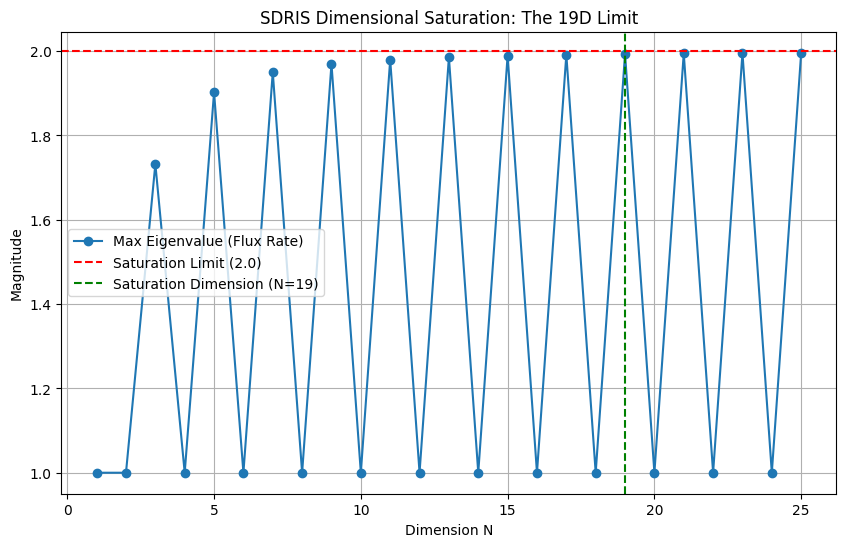

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

def generate_tilt_matrix(dim):
    """
    Generates the SDRIS Tilt Matrix J_N for a given dimension N.

    Structure:
    - Odd dimensions (N%2 != 0): Tridiagonal skew-hermitian (Flux Tunnel, det=0).
    - Even dimensions (N%2 == 0): Block-diagonal skew-hermitian (Stable Container, det!=0).
    """
    matrix = np.zeros((dim, dim), dtype=complex)

    if dim % 2 != 0: # Odd Dimension (Flux Tunnel)
        np.fill_diagonal(matrix[1:], 1j)
        np.fill_diagonal(matrix[:, 1:], -1j)
        # Boundary condition for tunnel
        matrix[0, -1] = 1j
        matrix[-1, 0] = -1j

    else: # Even Dimension (Stable Container)
        # Block structure [[0, i], [-i, 0]]
        for i in range(0, dim, 2):
            matrix[i, i+1] = 1j
            matrix[i+1, i] = -1j

    return matrix

def analyze_stability(max_dim=25):
    """
    Calculates the maximum eigenvalue (flux rate) for dimensions 1 to max_dim.
    """
    results = []
    print(f"{'Dim':<5} | {'Max Eigenvalue':<15} | {'Determinant (Abs)':<15} | {'Type'}")
    print("-" * 55)

    for n in range(1, max_dim + 1):
        J = generate_tilt_matrix(n)
        eigenvalues = eig(J)[0]
        max_ev = np.max(np.abs(eigenvalues))
        det = np.abs(np.linalg.det(J))

        dim_type = "Tunnel (Odd)" if n % 2 != 0 else "Container (Even)"
        results.append((n, max_ev, det))

        print(f"{n:<5} | {max_ev:<15.4f} | {det:<15.4f} | {dim_type}")

    return results

def plot_saturation(results):
    dims, max_evs, dets = zip(*results)

    plt.figure(figsize=(10, 6))
    plt.plot(dims, max_evs, 'o-', label='Max Eigenvalue (Flux Rate)')
    plt.axhline(y=2.0, color='r', linestyle='--', label='Saturation Limit (2.0)')
    plt.axvline(x=19, color='g', linestyle='--', label='Saturation Dimension (N=19)')

    plt.xlabel('Dimension N')
    plt.ylabel('Magnitude')
    plt.title('SDRIS Dimensional Saturation: The 19D Limit')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    print("Running SDRIS Genesis Algorithm Simulation...\n")
    data = analyze_stability(25)
    plot_saturation(data)